In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
matplotlib.rcParams['figure.dpi'] = 150

In [30]:
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)

    # Polynomial coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x) # or [p(z) for z in x]
    ybar = np.sum(y)/len(y) # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2) # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2) # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    return results

### Washington (WA) — Lincoln, Okanogan, Skagit, Spokane, Whitman

In [63]:
df_insurance_WA = pd.read_excel("Data_KS_WA/WA/WA_Report_Generator.xlsx")
df_insurance_WA = df_insurance_WA[df_insurance_WA['Commodity Name'] != 'All Other Commodities']

df_insurance_WA_Lincoln = df_insurance_WA[df_insurance_WA['County Name'] == 'Lincoln']
df_insurance_WA_Okanogan = df_insurance_WA[df_insurance_WA['County Name'] == 'Okanogan']
df_insurance_WA_Skagit = df_insurance_WA[df_insurance_WA['County Name'] == 'Skagit']
df_insurance_WA_Spokane = df_insurance_WA[df_insurance_WA['County Name'] == 'Spokane']
df_insurance_WA_Whitman = df_insurance_WA[df_insurance_WA['County Name'] == 'Whitman']

df_insurance_WA.head()

,Commodity Year,Commodity Name,State Abbrv,County Name,Policies Sold,Policies Earning Prem,Policies Indemnified,Units Earning Prem,Units Indemnified,Quantity,...,Companion/Endorsed Acres,Liabilities ($),Total Prem ($),Subsidy ($),Indemnity ($),EFA Prem Discount ($),Addnl Subsidy ($),State Subsidy ($),Earn Prem Rate,Loss Ratio
2,1989,WHEAT,WA,Lincoln,747,747,431,1481,695,200126,...,0,22702070,870493,150821,1709526,0,0,0,0.038,2
3,1989,WHEAT,WA,Spokane,132,132,31,235,39,19065,...,0,2503169,106985,19320,76808,0,0,0,0.043,0.72
4,1989,WHEAT,WA,Whitman,1215,1215,353,2062,470,280461,...,0,40049559,1117467,193273,1378891,0,0,0,0.028,1.2
8,1990,WHEAT,WA,Lincoln,725,701,87,1452,111,186152,...,0,23933491,936365,164373,331388,0,0,0,0.039,0.35
9,1990,WHEAT,WA,Whitman,908,880,16,1513,16,222992,...,0,35668352,1022673,172482,91004,0,0,0,0.029,0.089


#### Loss ratio (annual)

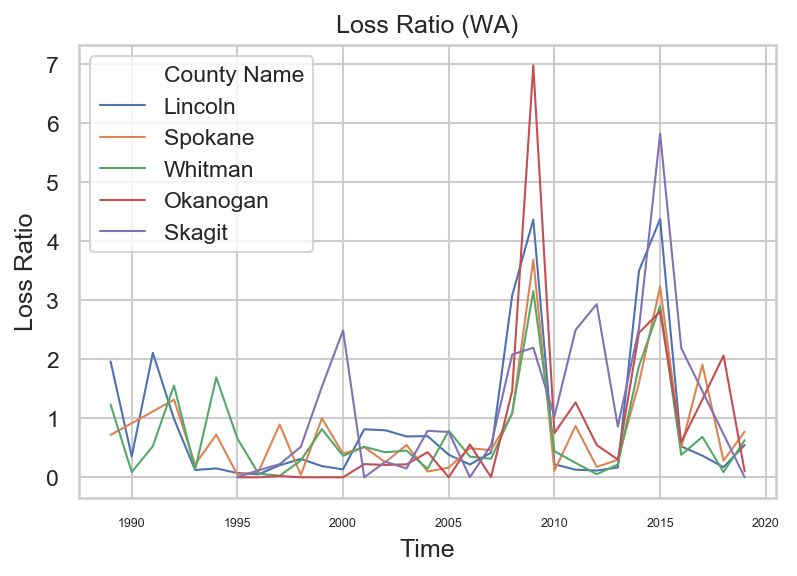

In [9]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
loss_ratio_plot = sns.lineplot(data=df_insurance_WA, x='Commodity Year', y='Loss Ratio', hue='County Name', ci=95)
loss_ratio_plot.set(xlabel='Time', ylabel='Loss Ratio')
plt.xticks(fontsize=6)
plt.title('Loss Ratio (WA)')
plt.show()

#### Indemnity, by county (annual)

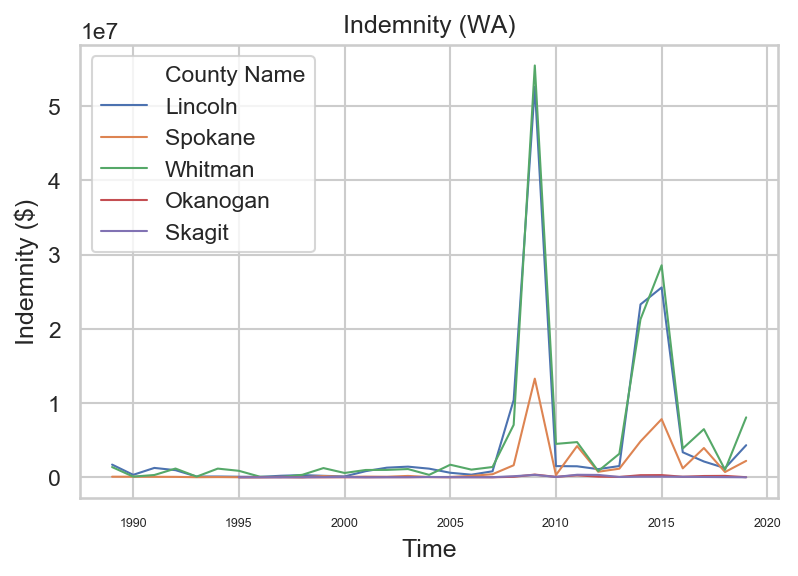

In [12]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
loss_ratio_plot = sns.lineplot(data=df_insurance_WA, x='Commodity Year', y='Indemnity ($)', hue='County Name', ci=95)
loss_ratio_plot.set(xlabel='Time', ylabel='Indemnity ($)')
plt.xticks(fontsize=6)
plt.title('Indemnity (WA)')
plt.show()

R^2 value: 0.10245512558815761
m: [[380054.75524194]]
b: [-7.5709797e+08]


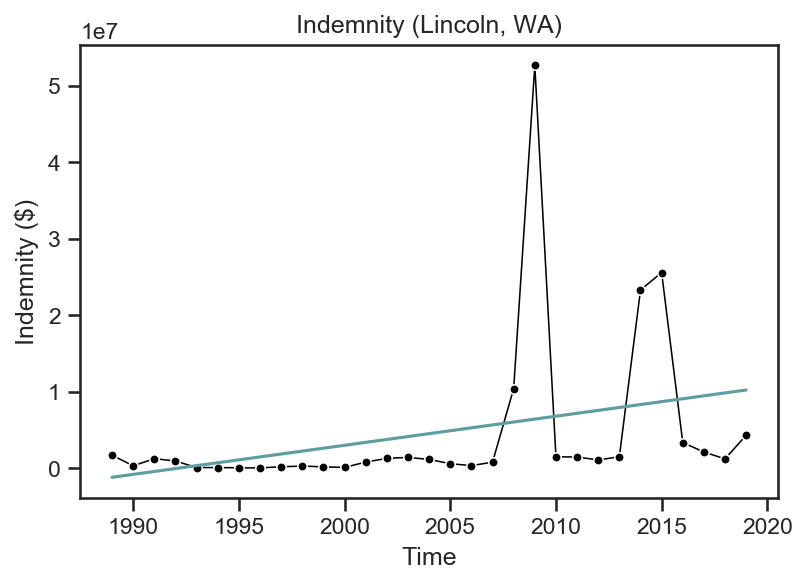

In [31]:
# Lincoln, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_WA_Lincoln, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_WA_Lincoln['Commodity Year'].to_numpy(), df_insurance_WA_Lincoln['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='cadetblue')
plt.title('Indemnity (Lincoln, WA)')
plt.show()

{'polynomial': [-5323.742526347043, 31999598.847799174, -64112541075.97874, 42816627693018.93], 'determination': 0.1830076762974131}


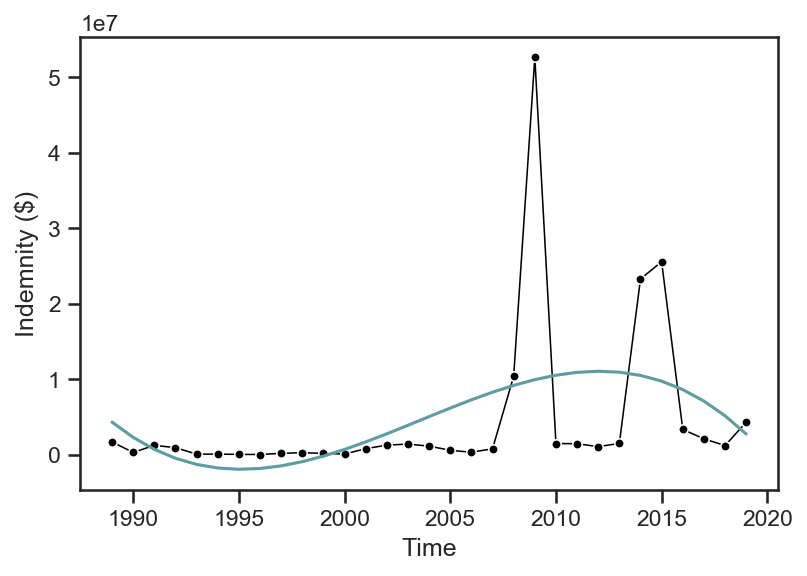

In [32]:
# Lincoln, polynomial regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot_poly = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_WA_Lincoln, color='black', marker='o')
indemnity_plot_poly.set(xlabel='Time', ylabel='Indemnity ($)')

x, y = df_insurance_WA_Lincoln['Commodity Year'].to_numpy(), df_insurance_WA_Lincoln['Indemnity ($)'].to_numpy()
results = polyfit(x, y, 3) # indicate polynomial degree
print(results)

coeffs = list(reversed(results['polynomial']))
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
plt.plot(x, y, linewidth=1.5, color='cadetblue')
plt.show()

R^2 value: 0.3300780628644141
m: [[8747.11]]
b: [-17475649.24999999]


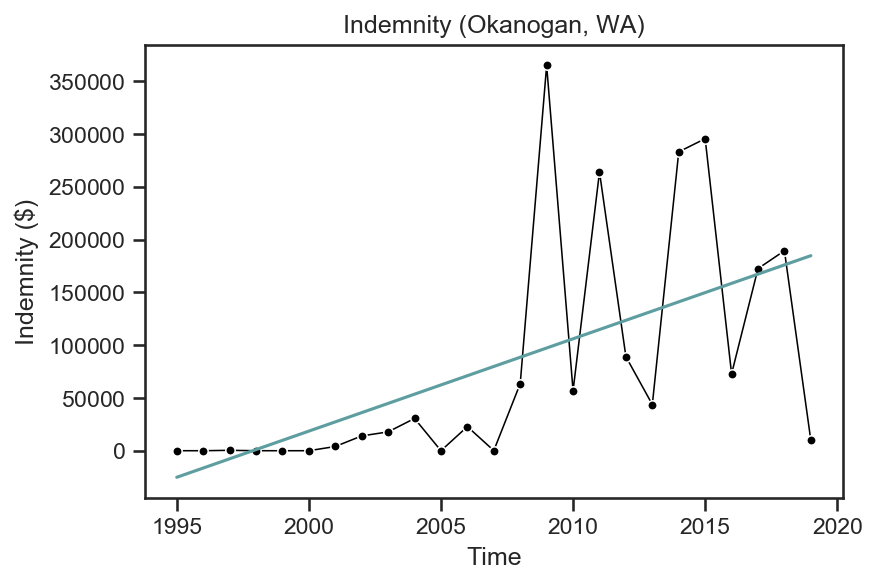

In [65]:
# Okanogan, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_WA_Okanogan, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_WA_Okanogan['Commodity Year'].to_numpy(), df_insurance_WA_Okanogan['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='cadetblue')
plt.ticklabel_format(style='sci', useMathText=True, axis='y')
plt.title('Indemnity (Okanogan, WA)')
plt.show()

R^2 value: 0.15890730760779193
m: [[6190.53778307]]
b: [-12348736.31785363]


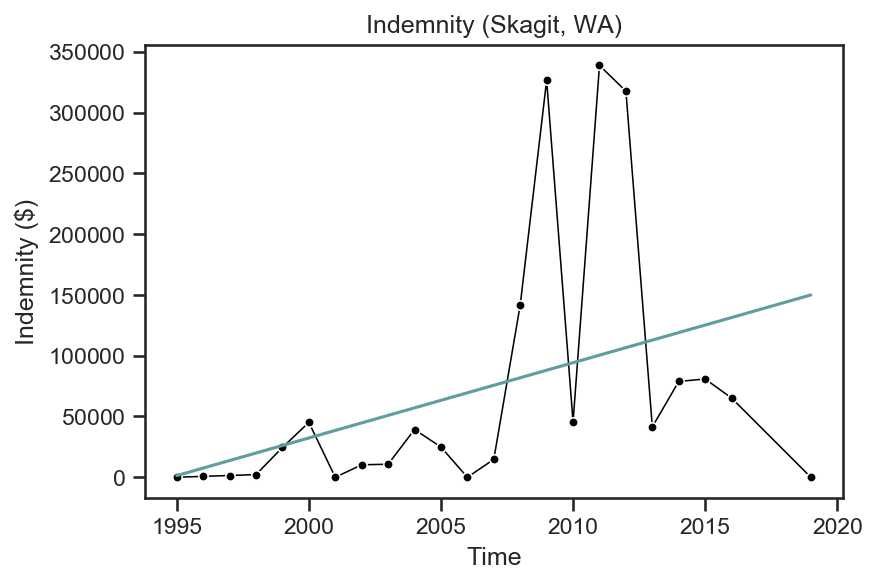

In [67]:
# Skagit, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_WA_Skagit, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_WA_Skagit['Commodity Year'].to_numpy(), df_insurance_WA_Skagit['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='cadetblue')
plt.ticklabel_format(style='sci', useMathText=True, axis='y')
plt.title('Indemnity (Skagit, WA)')
plt.show()

R^2 value: 0.20414556913609394
m: [[153470.58457908]]
b: [-3.06196689e+08]


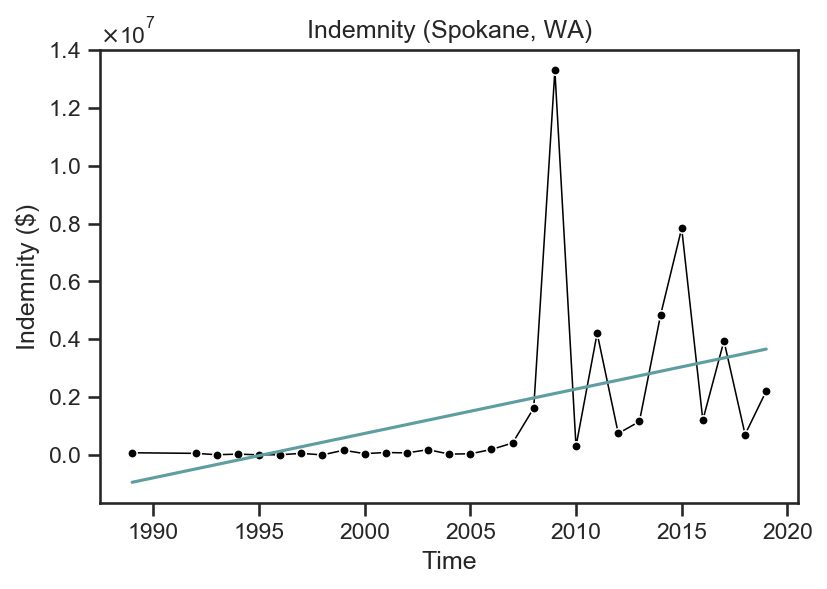

In [68]:
# Spokane, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_WA_Spokane, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_WA_Spokane['Commodity Year'].to_numpy(), df_insurance_WA_Spokane['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='cadetblue')
plt.ticklabel_format(style='sci', useMathText=True, axis='y')
plt.title('Indemnity (Spokane, WA)')
plt.show()

R^2 value: 0.1353117373457664
m: [[453384.18024194]]
b: [-9.0342098e+08]


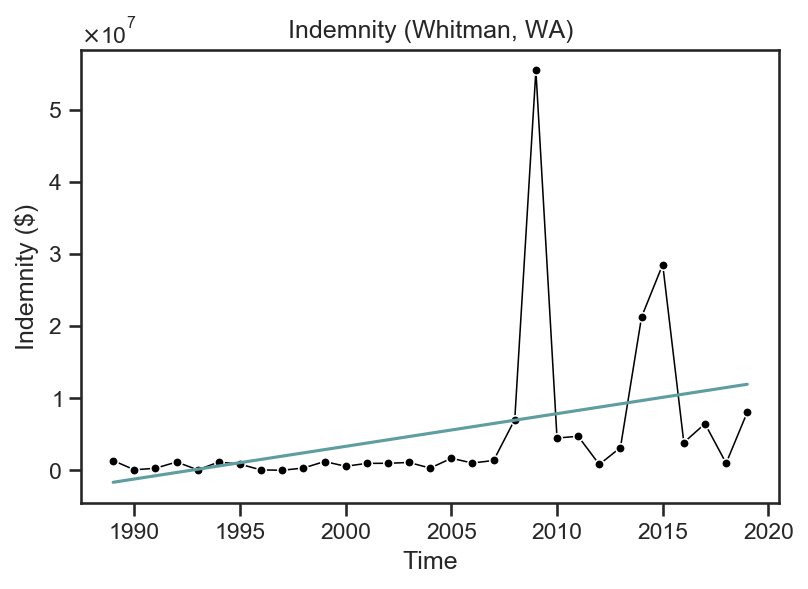

In [69]:
# Whitman, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_WA_Whitman, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_WA_Whitman['Commodity Year'].to_numpy(), df_insurance_WA_Whitman['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='cadetblue')
plt.ticklabel_format(style='sci', useMathText=True, axis='y')
plt.title('Indemnity (Whitman, WA)')
plt.show()

#### Total premium, by county (annual)

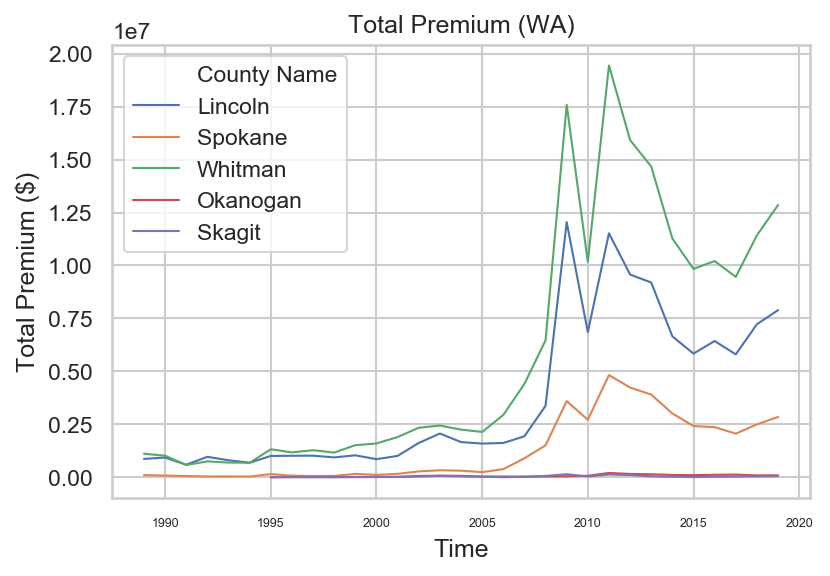

In [75]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
total_prem_plot = sns.lineplot(data=df_insurance_WA, x='Commodity Year', y='Total Prem ($)', hue='County Name', ci=95)
total_prem_plot.set(xlabel='Time', ylabel='Total Premium ($)')
plt.xticks(fontsize=6)
plt.title('Total Premium (WA)')
plt.show()

R^2 value: 0.6044709533160173
m: [[306489.76370968]]
b: [-6.10504696e+08]


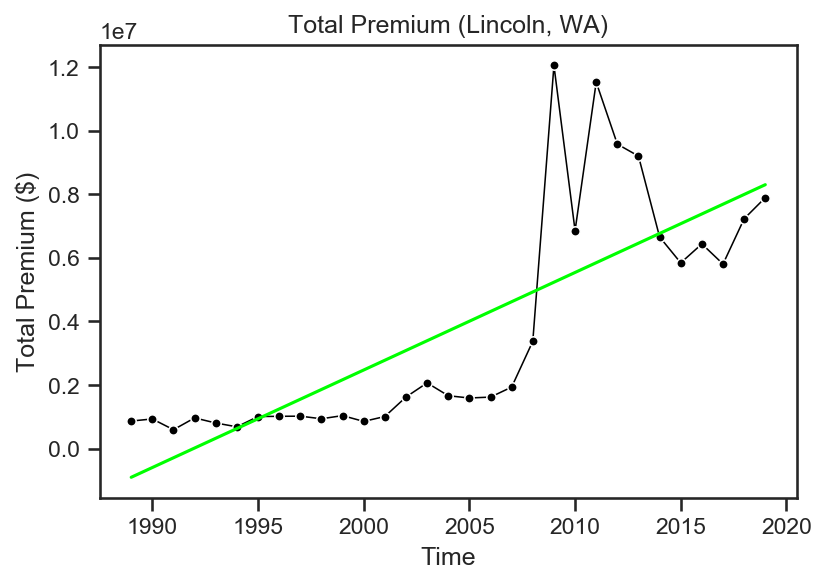

In [77]:
# Lincoln, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_WA_Lincoln, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_WA_Lincoln['Commodity Year'].to_numpy(), df_insurance_WA_Lincoln['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='lime')
plt.title('Total Premium (Lincoln, WA)')
plt.show()

{'polynomial': [-1859.9124284236968, 11187605.687331697, -22431035436.209488, 14990948702546.754], 'determination': 0.705255972441195}


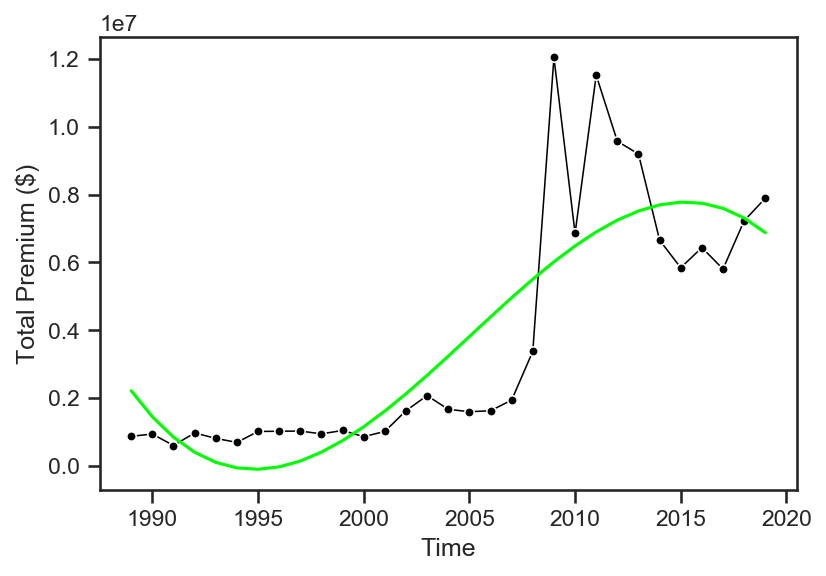

In [82]:
# Lincoln, polynomial regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot_poly = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_WA_Lincoln, color='black', marker='o')
indemnity_plot_poly.set(xlabel='Time', ylabel='Total Premium ($)')

x, y = df_insurance_WA_Lincoln['Commodity Year'].to_numpy(), df_insurance_WA_Lincoln['Total Prem ($)'].to_numpy()
results = polyfit(x, y, 3) # indicate polynomial degree
print(results)

coeffs = list(reversed(results['polynomial']))
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x])
plt.plot(x, y, linewidth=1.5, color='lime')
plt.show()

R^2 value: 0.5648268601219313
m: [[5445.55230769]]
b: [-10856990.04153846]


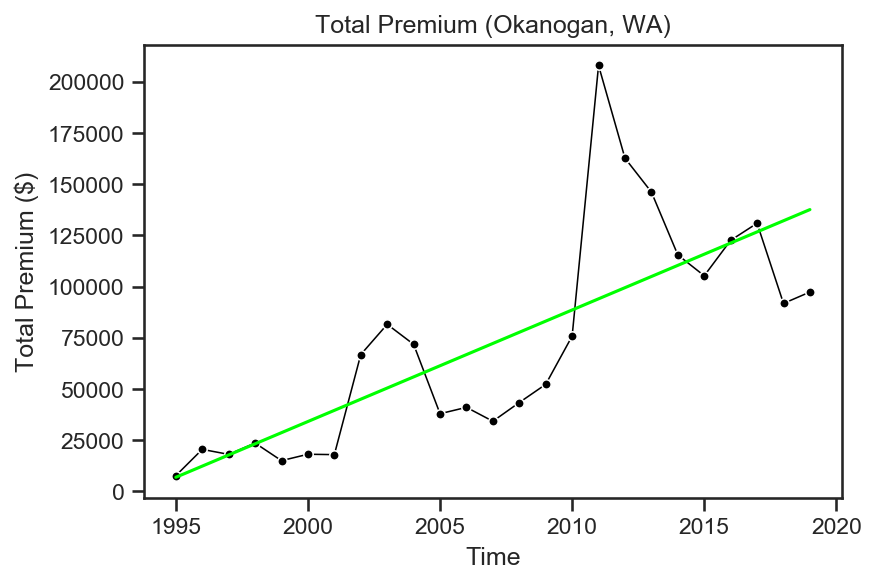

In [84]:
# Okanogan, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_WA_Okanogan, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_WA_Okanogan['Commodity Year'].to_numpy(), df_insurance_WA_Okanogan['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='lime')
plt.title('Total Premium (Okanogan, WA)')
plt.show()

R^2 value: 0.19025486047821272
m: [[2520.99220545]]
b: [-5013873.23301608]


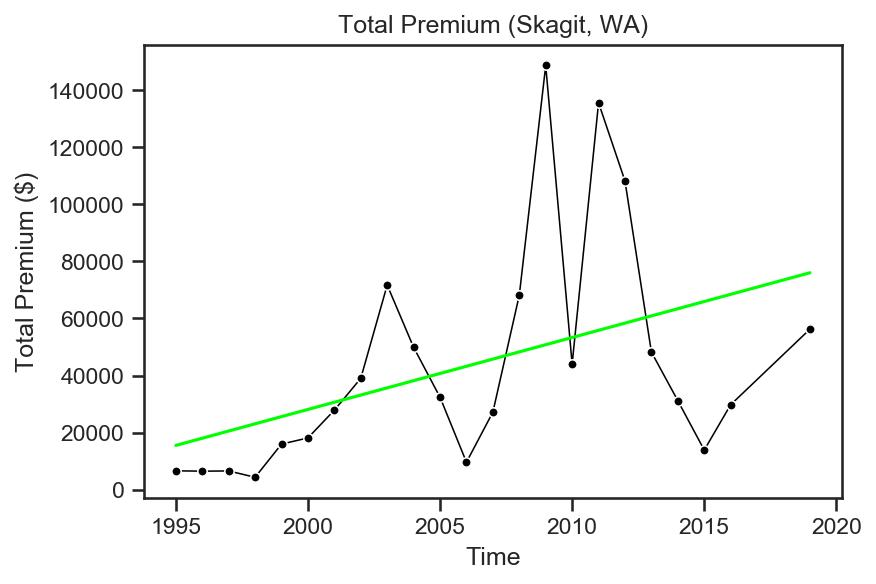

In [83]:
# Skagit, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_WA_Skagit, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_WA_Skagit['Commodity Year'].to_numpy(), df_insurance_WA_Skagit['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='lime')
plt.title('Total Premium (Skagit, WA)')
plt.show()

R^2 value: 0.6165105139626157
m: [[139465.04544105]]
b: [-2.78253886e+08]


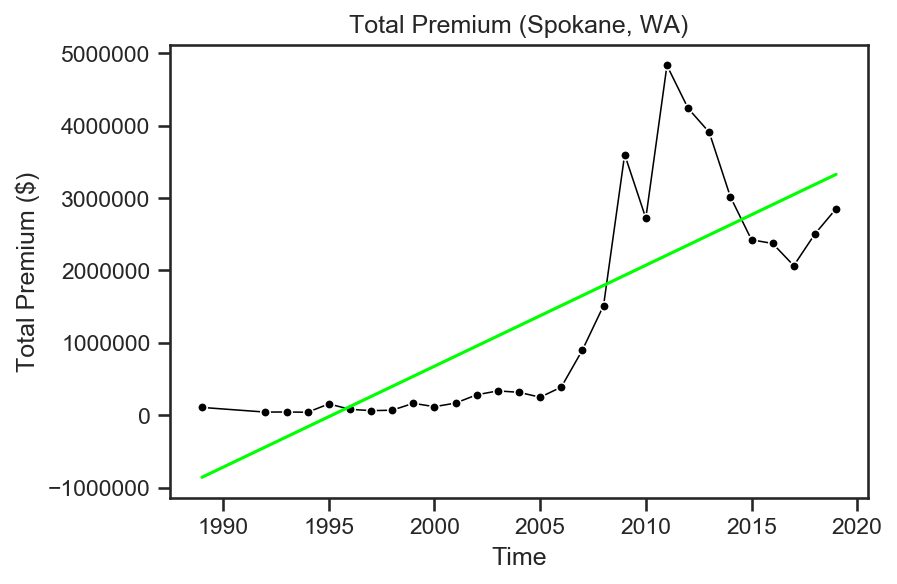

In [85]:
# Spokane, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_WA_Spokane, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_WA_Spokane['Commodity Year'].to_numpy(), df_insurance_WA_Spokane['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='lime')
plt.title('Total Premium (Spokane, WA)')
plt.show()

R^2 value: 0.64617694193487
m: [[517793.09475806]]
b: [-1.03182846e+09]


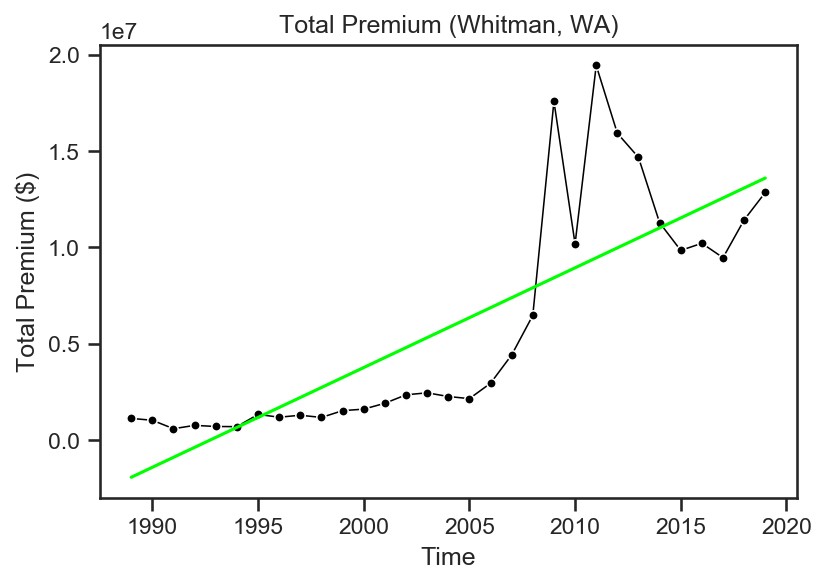

In [86]:
# Whitman, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_WA_Whitman, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_WA_Whitman['Commodity Year'].to_numpy(), df_insurance_WA_Whitman['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='lime')
plt.title('Total Premium (Whitman, WA)')
plt.show()

#### Liabilities

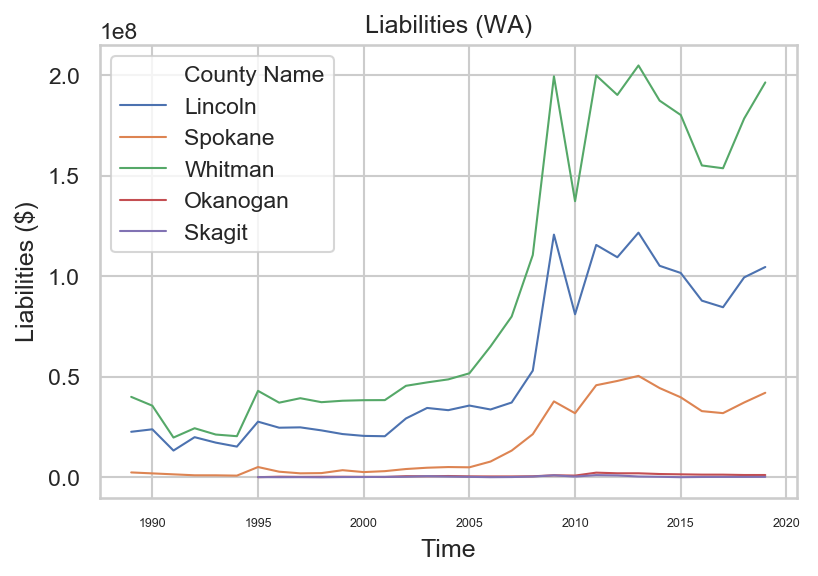

In [93]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
total_prem_plot = sns.lineplot(data=df_insurance_WA, x='Commodity Year', y='Liabilities ($)', hue='County Name', ci=95)
total_prem_plot.set(xlabel='Time', ylabel='Liabilities ($)')
plt.xticks(fontsize=6)
plt.title('Liabilities (WA)')
plt.show()

#### Earn Premium Rate

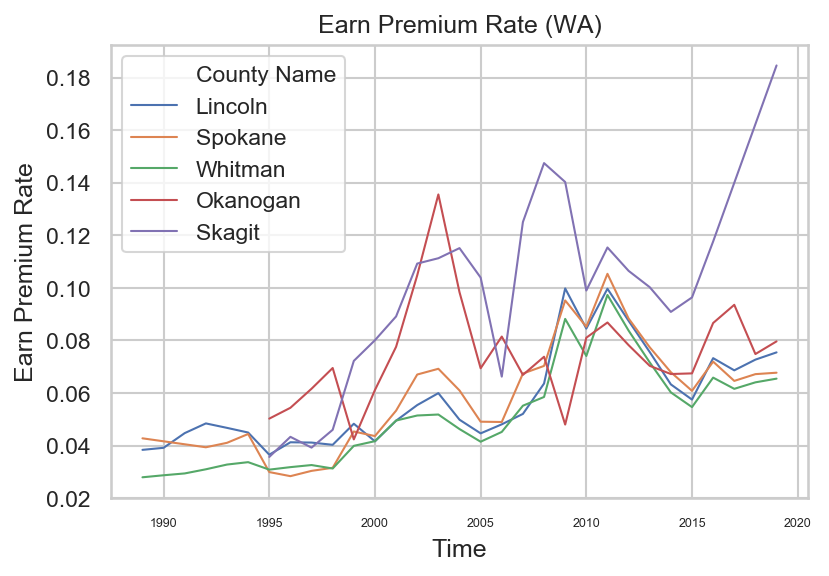

In [98]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
total_prem_plot = sns.lineplot(data=df_insurance_WA, x='Commodity Year', y='Earn Prem Rate', hue='County Name', ci=95)
total_prem_plot.set(xlabel='Time', ylabel='Earn Premium Rate')
plt.xticks(fontsize=6)
plt.title('Earn Premium Rate (WA)')
plt.show()

#### Jointplot — indemnity and total premium

### Kansas (KS) — Grant, Gray, Haskell, Kearny, Morton

In [10]:
df_insurance_KS = pd.read_excel("Data_KS_WA/KS/KS_Report_Generator.xlsx")
df_insurance_KS = df_insurance_KS[df_insurance_KS['Commodity Name'] != 'All Other Commodities']

df_insurance_KS_Grant = df_insurance_KS[df_insurance_KS['County Name'] == 'Grant']
df_insurance_KS_Gray = df_insurance_KS[df_insurance_KS['County Name'] == 'Gray']
df_insurance_KS_Haskell = df_insurance_KS[df_insurance_KS['County Name'] == 'Haskell']
df_insurance_KS_Kearny = df_insurance_KS[df_insurance_KS['County Name'] == 'Kearny']
df_insurance_KS_Morton = df_insurance_KS[df_insurance_KS['County Name'] == 'Morton']

df_insurance_KS.head()

,Commodity Year,Commodity Name,State Abbrv,County Name,Policies Sold,Policies Earning Prem,Policies Indemnified,Units Earning Prem,Units Indemnified,Quantity,...,Companion/Endorsed Acres,Liabilities ($),Total Prem ($),Subsidy ($),Indemnity ($),EFA Prem Discount ($),Addnl Subsidy ($),State Subsidy ($),Earn Prem Rate,Loss Ratio
0,1989,WHEAT,KS,Grant,49,47,28,145,71,10051,...,0,685702,71500,21381,158457,0,0,0,0.104272,2.216181
1,1989,WHEAT,KS,Gray,129,126,76,251,124,20935,...,0,1229482,127161,37941,365098,0,0,0,0.103426,2.871147
2,1989,WHEAT,KS,Haskell,75,71,34,181,73,13570,...,0,969071,80135,23696,131035,0,0,0,0.082692,1.635178
3,1989,WHEAT,KS,Kearny,63,57,28,182,42,15541,...,0,921050,116608,34732,87687,0,0,0,0.126603,0.751980
4,1989,WHEAT,KS,Morton,74,72,57,280,197,20192,...,0,1193355,138764,40781,441029,0,0,0,0.116280,3.178266


#### Loss ratio (annual)

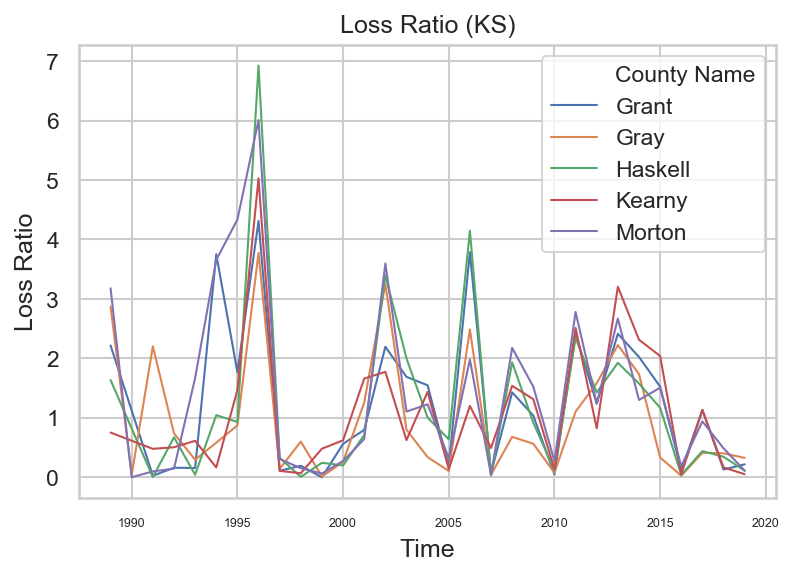

In [11]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
loss_ratio_plot = sns.lineplot(data=df_insurance_KS, x='Commodity Year', y='Loss Ratio', hue='County Name', ci=95)
loss_ratio_plot.set(xlabel='Time', ylabel='Loss Ratio')
plt.xticks(fontsize=6)
plt.title('Loss Ratio (KS)')
plt.show()

#### Indemnity, by county (annual)

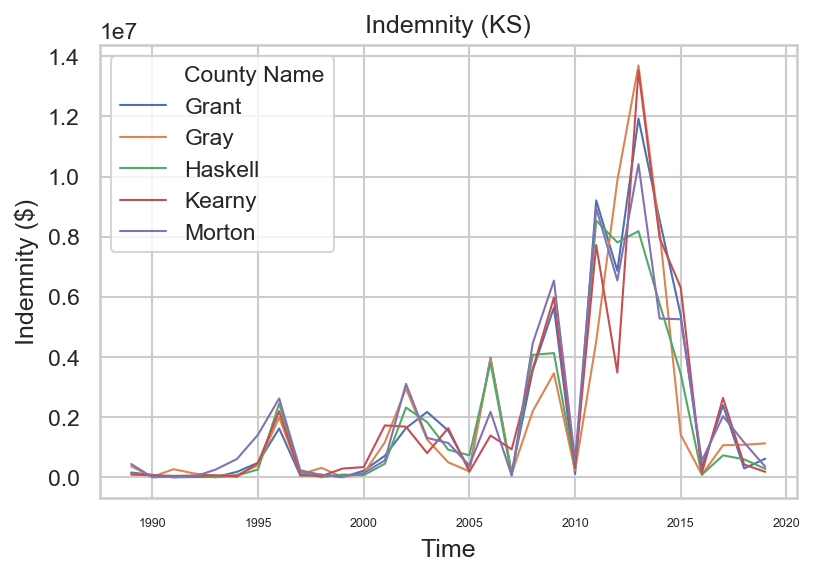

In [13]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
loss_ratio_plot = sns.lineplot(data=df_insurance_KS, x='Commodity Year', y='Indemnity ($)', hue='County Name', ci=95)
loss_ratio_plot.set(xlabel='Time', ylabel='Indemnity ($)')
plt.xticks(fontsize=6)
plt.title('Indemnity (KS)')
plt.show()

R^2 value: 0.24335981950886598
m: [[179519.37070429]]
b: [-3.57568183e+08]


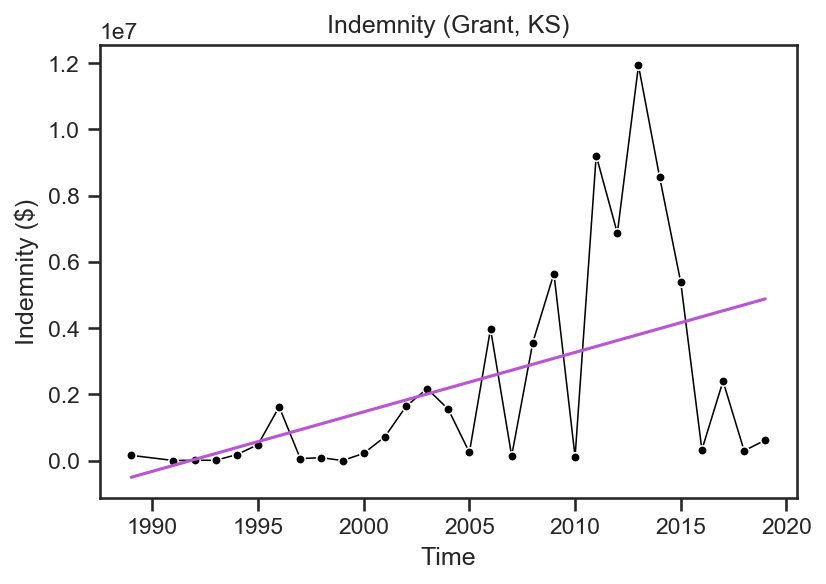

In [70]:
# Grant, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_KS_Grant, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_KS_Grant['Commodity Year'].to_numpy(), df_insurance_KS_Grant['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumorchid')
plt.title('Indemnity (Grant, KS)')
plt.show()

R^2 value: 0.17853951973929671
m: [[148687.18548387]]
b: [-2.9600568e+08]


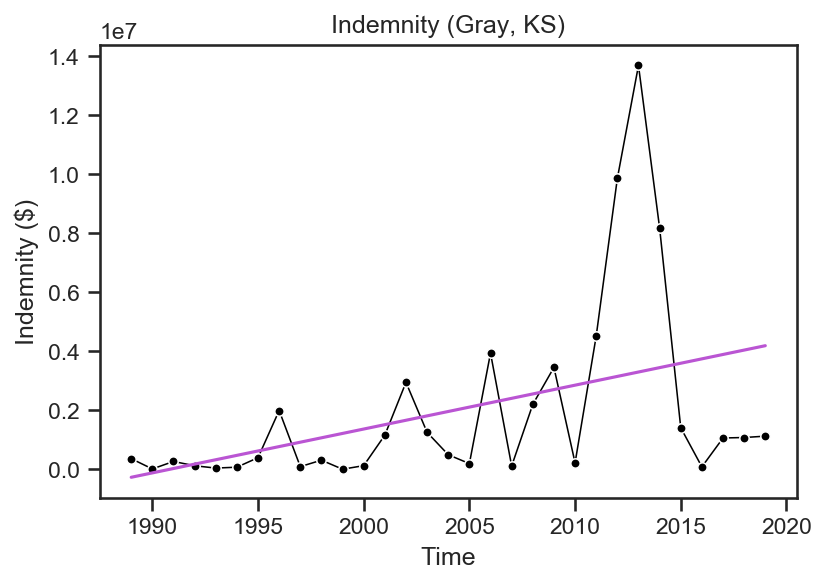

In [71]:
# Gray, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_KS_Gray, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_KS_Gray['Commodity Year'].to_numpy(), df_insurance_KS_Gray['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumorchid')
plt.title('Indemnity (Gray, KS)')
plt.show()

R^2 value: 0.1956962527229852
m: [[131791.36001991]]
b: [-2.62261421e+08]


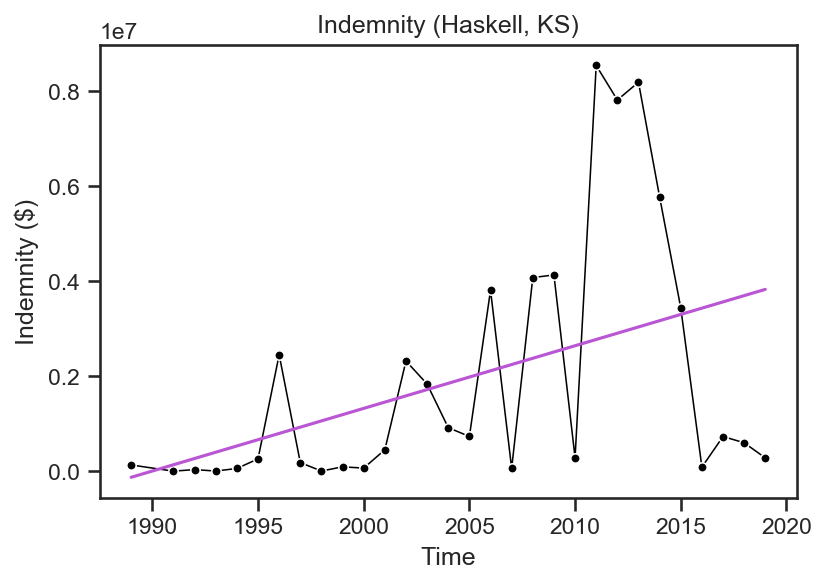

In [72]:
# Haskell, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_KS_Haskell, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_KS_Haskell['Commodity Year'].to_numpy(), df_insurance_KS_Haskell['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumorchid')
plt.title('Indemnity (Haskell, KS)')
plt.show()

R^2 value: 0.2173889796986367
m: [[167178.27152977]]
b: [-3.32959557e+08]


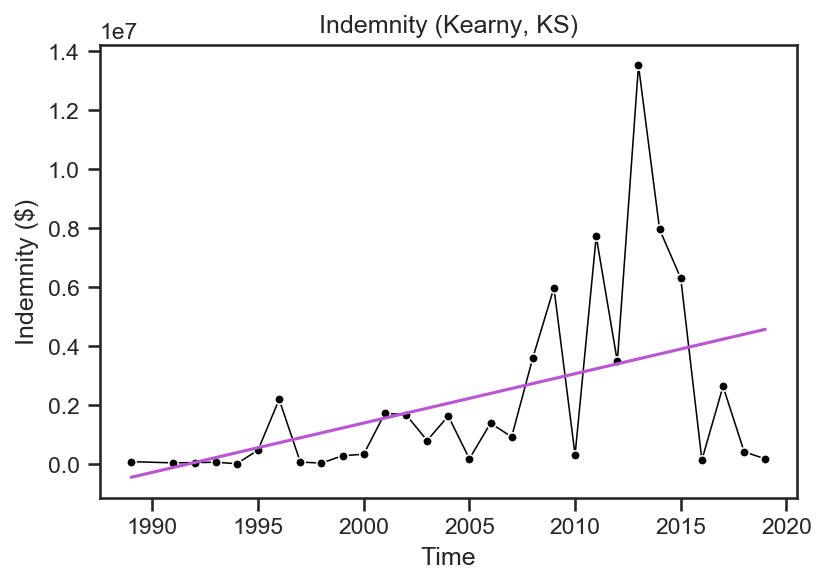

In [73]:
# Kearny, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_KS_Kearny, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_KS_Kearny['Commodity Year'].to_numpy(), df_insurance_KS_Kearny['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumorchid')
plt.title('Indemnity (Kearny, KS)')
plt.show()

R^2 value: 0.23133986243907645
m: [[149491.05645161]]
b: [-2.97428311e+08]


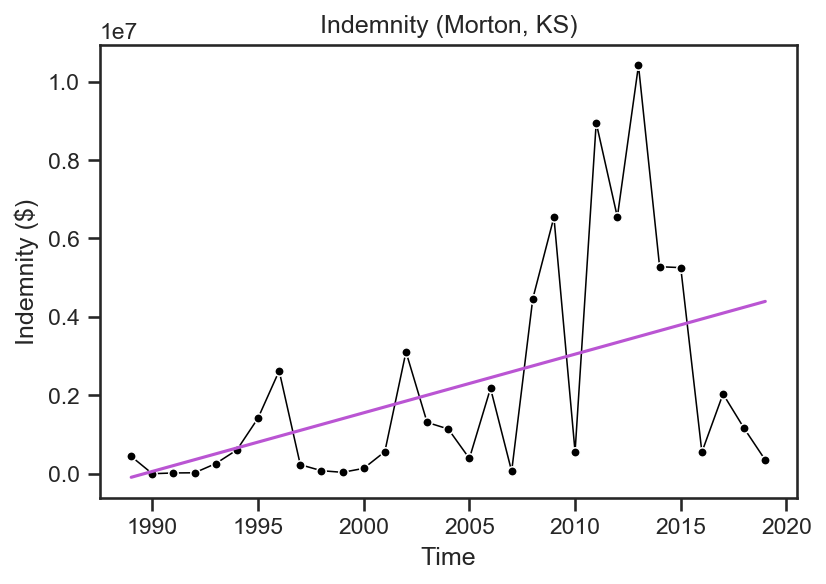

In [74]:
# Morton, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Indemnity ($)', data=df_insurance_KS_Morton, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Indemnity ($)')

# Linear regression
x, y = df_insurance_KS_Morton['Commodity Year'].to_numpy(), df_insurance_KS_Morton['Indemnity ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='mediumorchid')
plt.title('Indemnity (Morton, KS)')
plt.show()

#### Total premium, by county (annual)

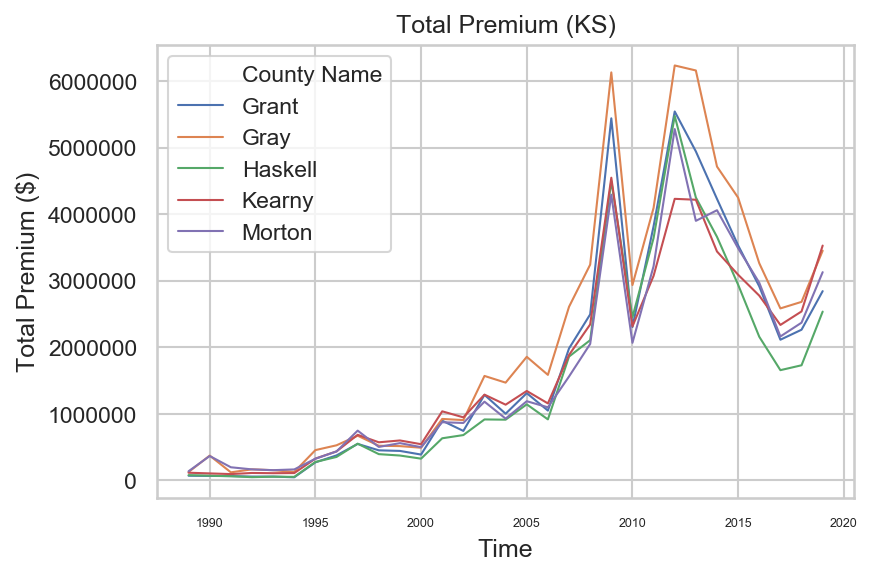

In [76]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
total_prem_plot = sns.lineplot(data=df_insurance_KS, x='Commodity Year', y='Total Prem ($)', hue='County Name', ci=95)
total_prem_plot.set(xlabel='Time', ylabel='Total Premium ($)')
plt.xticks(fontsize=6)
plt.title('Total Premium (KS)')
plt.show()

R^2 value: 0.6193631758488835
m: [[150999.83625081]]
b: [-3.00890464e+08]


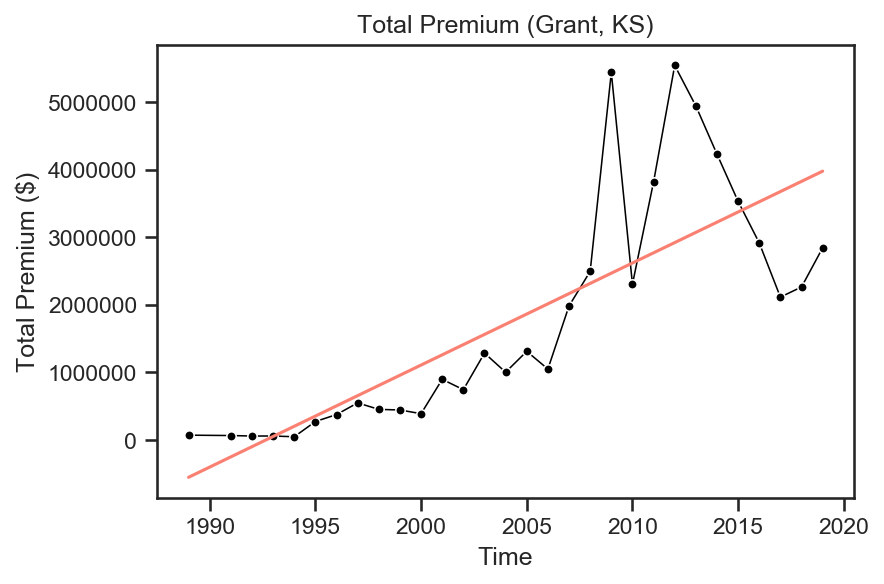

In [88]:
# Grant, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_KS_Grant, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_KS_Grant['Commodity Year'].to_numpy(), df_insurance_KS_Grant['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='salmon')
plt.title('Total Premium (Grant, KS)')
plt.show()

R^2 value: 0.6452686873113804
m: [[170726.44879032]]
b: [-3.40041364e+08]


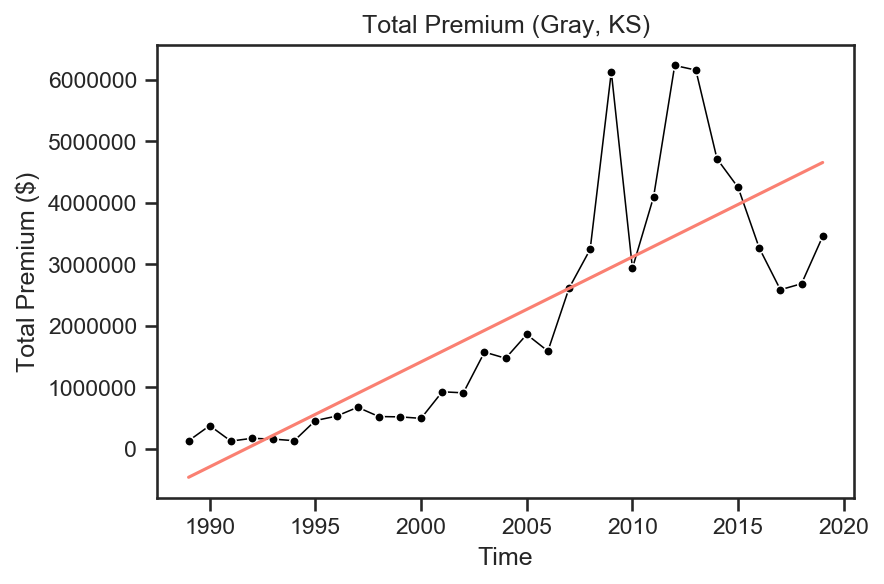

In [89]:
# Gray, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_KS_Gray, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_KS_Gray['Commodity Year'].to_numpy(), df_insurance_KS_Gray['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='salmon')
plt.title('Total Premium (Gray, KS)')
plt.show()

R^2 value: 0.5731307201232536
m: [[129892.24486271]]
b: [-2.58805865e+08]


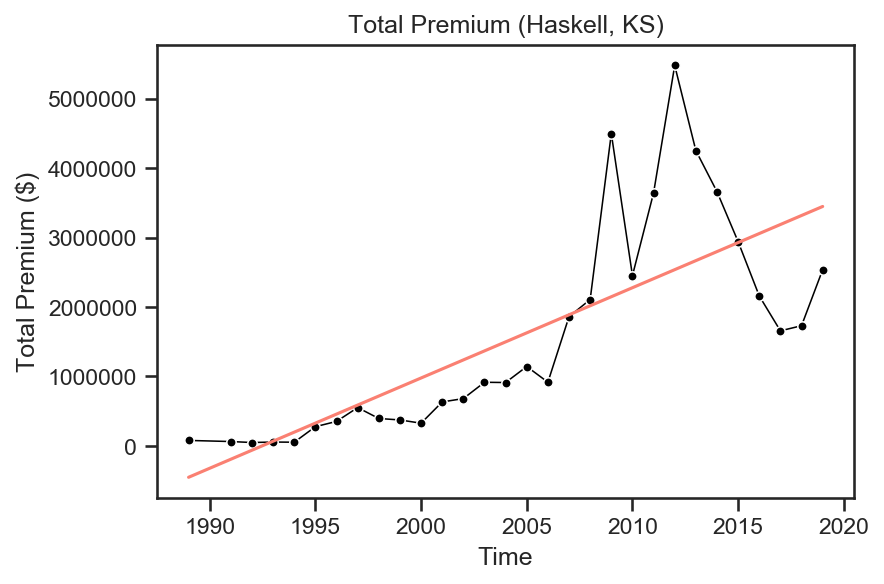

In [90]:
# Haskell, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_KS_Haskell, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_KS_Haskell['Commodity Year'].to_numpy(), df_insurance_KS_Haskell['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='salmon')
plt.title('Total Premium (Haskell, KS)')
plt.show()

R^2 value: 0.7524396384029086
m: [[137227.14966922]]
b: [-2.73368609e+08]


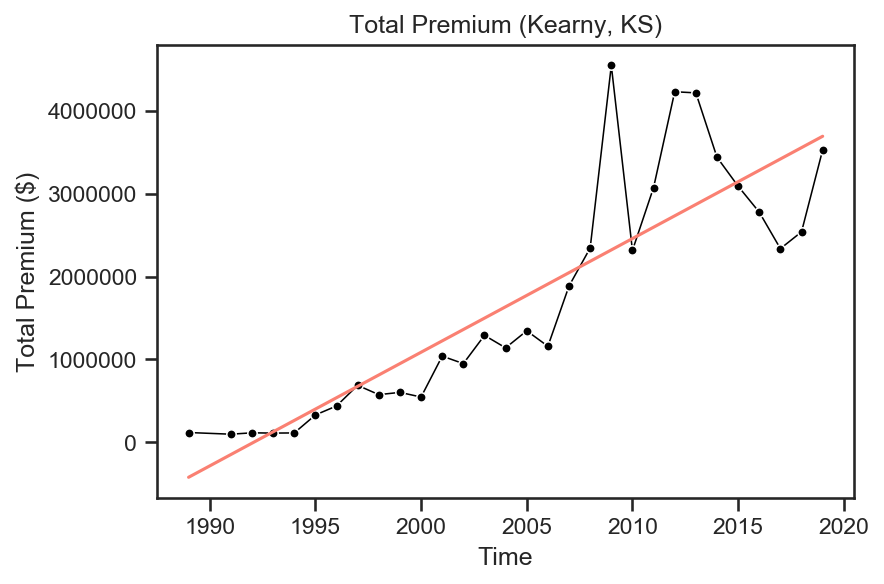

In [91]:
# Kearny, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_KS_Kearny, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_KS_Kearny['Commodity Year'].to_numpy(), df_insurance_KS_Kearny['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='salmon')
plt.title('Total Premium (Kearny, KS)')
plt.show()

R^2 value: 0.6873500975375427
m: [[134123.50645161]]
b: [-2.67139513e+08]


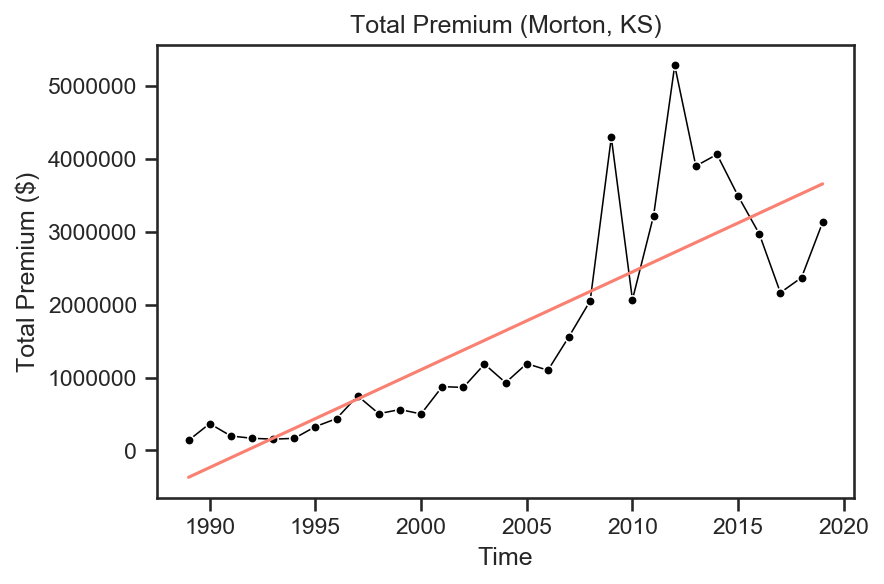

In [92]:
# Morton, linear regression

sns.set(rc={'lines.markersize': 4.5, 'lines.linewidth': 0.75})
sns.set_style("white")
sns.set_style("ticks")

indemnity_plot = sns.lineplot(x='Commodity Year', y='Total Prem ($)', data=df_insurance_KS_Morton, color='black', marker='o')
indemnity_plot.set(xlabel='Time', ylabel='Total Premium ($)')

# Linear regression
x, y = df_insurance_KS_Morton['Commodity Year'].to_numpy(), df_insurance_KS_Morton['Total Prem ($)'].to_numpy()
X, Y = x.reshape(-1,1), y.reshape(-1,1)
reg = LinearRegression().fit(X, Y)
print("R^2 value:", reg.score(X, Y))
print("m:", reg.coef_)
print("b:", reg.intercept_)

plt.plot(X, reg.predict(X), linewidth=1.5, color='salmon')
plt.title('Total Premium (Morton, KS)')
plt.show()

#### Liabilities

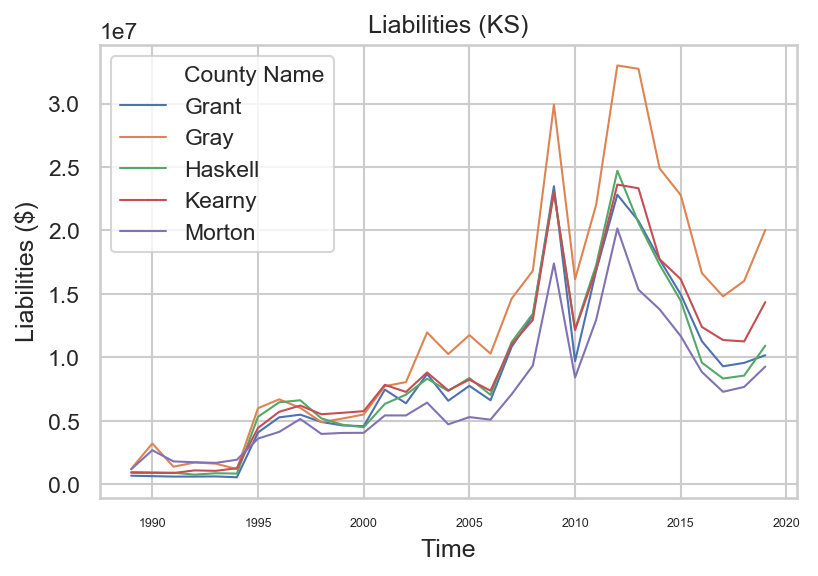

In [94]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
total_prem_plot = sns.lineplot(data=df_insurance_KS, x='Commodity Year', y='Liabilities ($)', hue='County Name', ci=95)
total_prem_plot.set(xlabel='Time', ylabel='Liabilities ($)')
plt.xticks(fontsize=6)
plt.title('Liabilities (KS)')
plt.show()

#### Earn Premium Rate

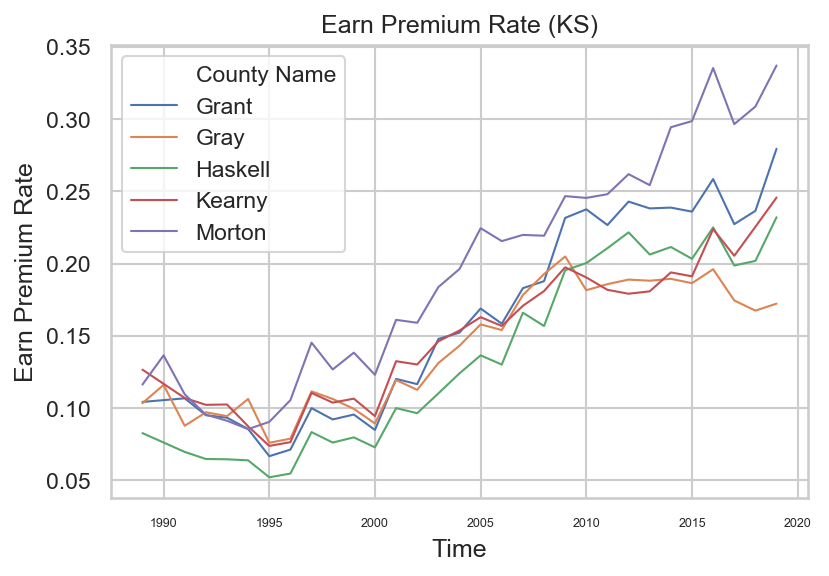

In [96]:
sns.set(rc={"lines.linewidth": 1.0})
sns.set_style("whitegrid")
        
total_prem_plot = sns.lineplot(data=df_insurance_KS, x='Commodity Year', y='Earn Prem Rate', hue='County Name', ci=95)
total_prem_plot.set(xlabel='Time', ylabel='Earn Premium Rate')
plt.xticks(fontsize=6)
plt.title('Earn Premium Rate (KS)')
plt.show()

#### Jointplot — indemnity and total premium